# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Gaussian Processes regression: basic introductory example

<br></font>
</div>

# Goal?

<div class="alert alert-block alert-info">
<font color=black><br>

- The kernel’s **parameters** are estimated using the maximum likelihood principle.
- The figures illustrate the interpolating property of the Gaussian Process model as well as its probabilistic nature in the form of a pointwise 95% confidence interval.
- Note that the parameter alpha is applied as a Tikhonov regularization of the assumed covariance between the training points.
- **Attention** for a confidence which is **pointwise** is a prediction interval is not a confidence interval. I just accept the fact this is widely misused!

<br></font>
</div>

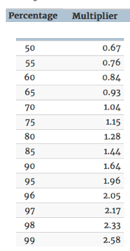

# Import modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from pylab import rcParams
np.random.seed(1)

# Function to predict

In [2]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [3]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 100)).T

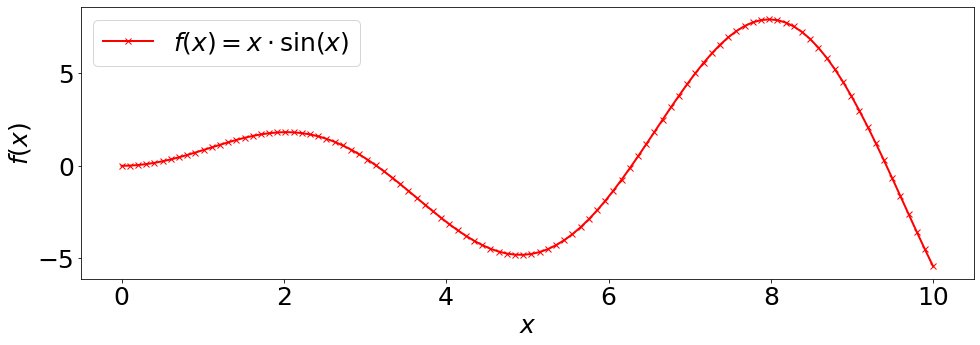

In [4]:
rcParams['font.size'] = 25
plt.figure(figsize=(16, 5))
plt.plot(x, f(x), 'rx-', lw = 2, label=r'$f(x) = x\cdot\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show();

# No noise case

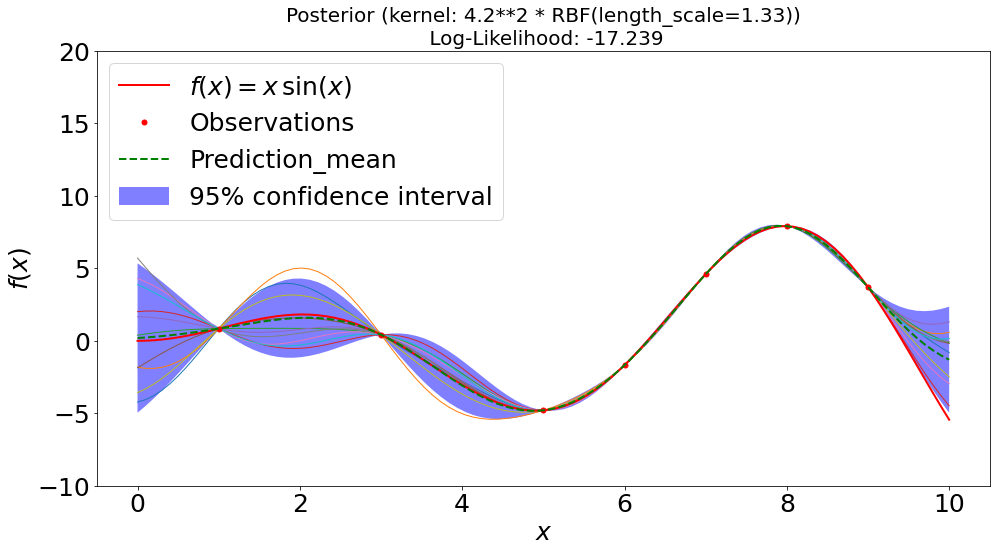

In [11]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8., 9.]).T

# Observations
y = f(X).ravel()

# Observations of the real function
X_real = np.atleast_2d([1., 3., 5., 6., 7., 8., 9.]).T
y_real = f(X).ravel()

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_real, y_real)


# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# We are sampling 10 curves, y_pred is nothing more than the mean of it
X_ = np.linspace(0, 10, 100)
y_samples = gp.sample_y(X_[:, np.newaxis], 10)


# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
rcParams['font.size'] = 25
plt.figure(figsize=(16, 8))
plt.plot(X_, y_samples, lw=1)
plt.plot(x, f(x), 'r-', lw = 2, label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'g--', lw = 2, label='Prediction_mean')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)), fontsize = 20)
plt.legend(loc='upper left')


# Noisy case

In [ ]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
rcParams['font.size'] = 25
plt.figure(figsize=(16, 8))
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)), fontsize = 20)
plt.legend(loc='upper left')

plt.show()

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

<br></font>
</div>